# Project: Investigate a Dataset - No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

I chose the 'No-Show Appointments' dataset. The dataset is collected from more than 100,000 medical appointments between November 2015 and June 2016 in Brazil. Each row has different characteristics of the patient. The dataset is meant to find out whether patients show up for their appointments as described [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True).
The columns in the dataset are: 
<ul>
    <li>PatientId - an identifier for each patient</li>
    <li>AppointmentID - a unique number for each appointment</li>
    <li>Gender - whether the patient is male or female</li>
    <li>ScheduledDay - the day the patient was set up for their appointment</li>
    <li>AppointmentDay - the actual date when they have an appointment at the hospital</li>
    <li>Age - how old the patient is in years.</li>
    <li>Neighbourhood - the location of the health facility where the appointment will take place</li>
    <li>Scholarship - whether or not the patient is enrolled into the brazilian social welfare program Bolsa Familia.</li>
    <li>Hipertension - whether the patient has hypertension.</li>
    <li>Diabetes - whether the patient is diabetic</li>
    <li>Alcoholism - whether the patient is suffering from alcoholism</li>
    <li>Handcap - whether the patient is living with any form of disability</li>
    <li>SMS_received - whether the patient received an SMS</li>
    <li>No-show - 'Yes' if the patient did not show up, or 'No' if they showed up for the appointment</li>
</ul>

### Question(s) for Analysis
In this analysis, I aim to answer the following questions:
<ul>
    <li> Whether or not patients show up for their appointment.</li>
    <li> What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?</li>
</ul>

In [1]:
# Imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# run this once ro upgrade pandas then restart kernel. Uncomment the below line first.
# !pip install --upgrade pandas

<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [3]:
# Load your data and print out a few lines.
#  Perform operations to inspect data types and look for instances of missing or possibly errant data.
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

# view the date
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# shape
df.shape

(110527, 14)

There are 110,527 rows and 14 columns in this dataset.

In [5]:
# information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# missing values per column
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

No column has missing values.

In [7]:
#duplicated rows 
df.duplicated().sum()

0

The data has no missing values or duplicated columns. 


### Data Cleaning


In [8]:
# format ScheduledDay and AppointmentDay columns to datetime
clean_df = df.copy()
clean_df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
clean_df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


Formatted the two columns as datetimes.

In [9]:
# find the date range of the data 
df.ScheduledDay.max(), df.ScheduledDay.min(),  df.AppointmentDay.max(), df.AppointmentDay.min()

('2016-06-08T20:07:23Z',
 '2015-11-10T07:13:56Z',
 '2016-06-08T00:00:00Z',
 '2016-04-29T00:00:00Z')

The appointments were set up between November 2015 and June 2016, where the patients were to attend for their appointments between April and June 2016.

In [10]:
# rename problematic column
clean_df.rename(columns={'No-show':'No_show'}, inplace=True)
clean_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


I changed the column 'No-show' to 'No_show', to use the dot notation to access the attributes.

In [11]:
# exploring data.
clean_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [12]:
# view unique values in the Age column to weed out errant values
clean_df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

There seems to be an age that is in the negative.

In [13]:
# find out how many rows have a negative age 
clean_df[clean_df['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


It seems its only one row, therefore i will drop it

In [14]:
# Dropping the errant row
clean_df.drop(clean_df[clean_df['Age']<0].index, inplace=True) 

In [15]:
# confirm that the row was dropped
clean_df[clean_df['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show


It was dropped successfully.

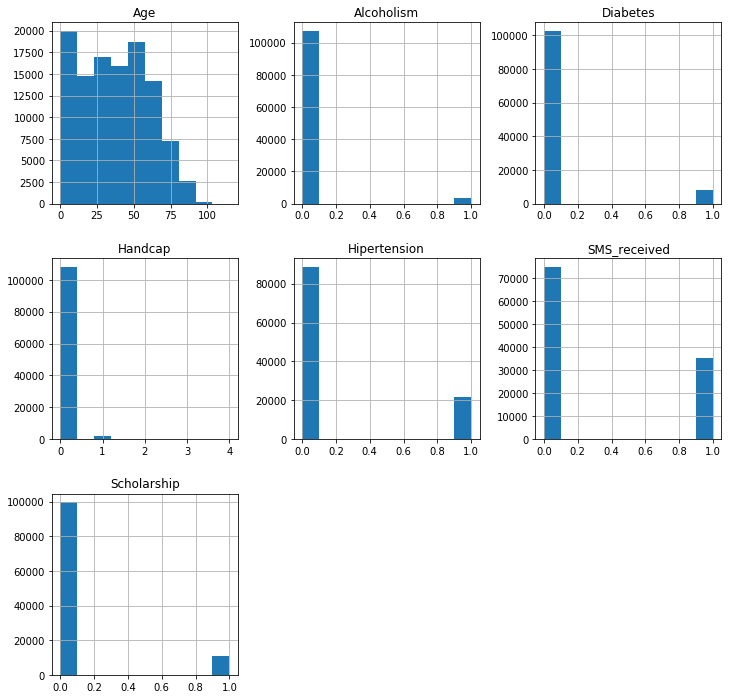

In [16]:
# visualize a few columns
clean_df[['Age','Alcoholism','Diabetes','Handcap','Hipertension','SMS_received','Scholarship']].hist(figsize=(12,12));

Above is a general visualization of a number of columns.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Find out whether or not patients show up for their appointment)

In [17]:
# shape of the clean dataset
clean_df.shape

(110526, 14)

In [18]:
# check the responses in the no_show column
clean_df.No_show.unique()

array(['No', 'Yes'], dtype=object)

In [19]:
# whether or not patients show up for their appointment
clean_df.groupby('No_show').mean()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
No_show,,,,,,,,,
No,1.476809e+14,5.681135e+06,37.790504,0.093904,0.204394,0.073838,0.030417,0.022742,0.291337
Yes,1.467523e+14,5.652259e+06,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371


In [20]:
clean_df.groupby('No_show').describe()

Age                                                      \
           count       mean        std  min   25%   50%   75%    max   
No_show                                                                
No       88207.0  37.790504  23.338645  0.0  18.0  38.0  56.0  115.0   
Yes      22319.0  34.317667  21.965941  0.0  16.0  33.0  51.0  115.0   

        Alcoholism           ...  SMS_received      Scholarship            \
             count      mean ...           75%  max       count      mean   
No_show                      ...                                            
No         88207.0  0.030417 ...           1.0  1.0     88207.0  0.093904   
Yes        22319.0  0.030333 ...           1.0  1.0     22319.0  0.115507   

                                            
              std  min  25%  50%  75%  max  
No_show                                     
No       0.291697  0.0  0.0  0.0  0.0  1.0  
Yes      0.319640  0.0  0.0  0.0  0.0  1.0  

[2 rows x 72 columns]

In [21]:
# proportions of those who showed and missed for their appointments
print(clean_df.No_show.value_counts())   # values
clean_df.No_show.value_counts(normalize=True)*100   # percentages

No     88207
Yes    22319
Name: No_show, dtype: int64


No     79.806561
Yes    20.193439
Name: No_show, dtype: float64

We see that out of the 110,526 appointments booked, 88,207 (\~79.8%) appointments were attended, while 22,319 (~20.2%) were missed.

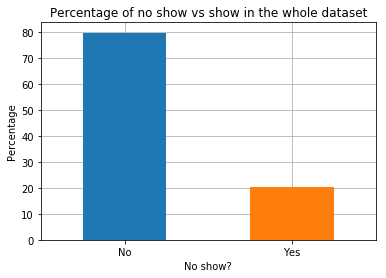

In [22]:
# visualize the above
(clean_df.No_show.value_counts(normalize=True)*100).plot(kind='bar', rot=0, zorder=2)
plt.grid(zorder=0)
plt.title('Percentage of no show vs show in the whole dataset')
plt.xlabel('No show?')
plt.ylabel('Percentage');

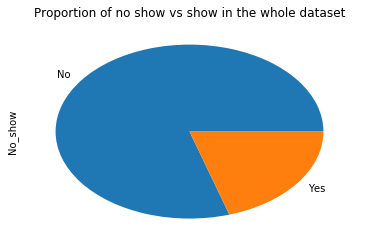

In [23]:
# pie chart
(clean_df.No_show.value_counts(normalize=True)*100).plot(kind='pie')
plt.title('Proportion of no show vs show in the whole dataset');

### Research Question 2  (Find out what factors are important for us to know in order to predict if a patient will show up for their scheduled appointment)

In [24]:
# Demarcate the dataset into those who missed their appointment and those who showed up.
missed = clean_df.query('No_show == "Yes"')
showed = clean_df.query('No_show == "No"')

missed.shape, showed.shape

((22319, 14), (88207, 14))

In [25]:
# can gender predict attendance?

# define general function to inspect an attribute across the dataset
def entir_inspect(attribute):
    print('Frequencies:')
    print(clean_df[attribute].value_counts()) # frequencies
    print('')
    print('Percentages:')
    print(clean_df[attribute].value_counts(normalize=True)*100)   # percentage

    
# inspect proportions of gender in the entire dataset
entir_inspect(attribute='Gender')

Frequencies:
F    71839
M    38687
Name: Gender, dtype: int64

Percentages:
F    64.997376
M    35.002624
Name: Gender, dtype: float64


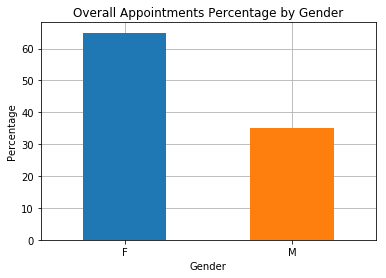

In [26]:
# visualize
(clean_df.Gender.value_counts(normalize=True)*100).plot(kind='bar', rot=0, zorder=2)
plt.grid(zorder=0)
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Overall Appointments Percentage by Gender');

About 65% (71,839) of the appointments were for female patients while ~35% (38,687) of the appointments had male patients.

In [27]:
# create a general function for making comparison 
# between proportions (percentage) of an attribute
# for those who showed up and those who missed

def compare(attribute):
    print('Missed:')
    print(missed[attribute].value_counts(normalize=True)*100)  # Missed
    print('')
    print('Showed:')
    print(showed[attribute].value_counts(normalize=True)*100)  # Showed up

In [28]:
# proportions (percentage) of gender in for those who showed up and those who missed
compare(attribute='Gender')

Missed:
F    65.388234
M    34.611766
Name: Gender, dtype: float64

Showed:
F    64.898477
M    35.101523
Name: Gender, dtype: float64


In [29]:
# create a general function to use in making bar plots for the various attributes

def bar_plot(attribute,title,legend):
    # create a new dataframe form the derived percentages of the attribute we are analysing
    x = {'Missed': missed[attribute].value_counts(normalize=True)*100,
         'Showed': showed[attribute].value_counts(normalize=True)*100,
         'Overall': clean_df[attribute].value_counts(normalize=True)*100
        }
    
    dataframe = pd.DataFrame(x)

    # transpose and plot
    dataframe.T.plot(kind='bar', rot=0, zorder=2)  # same in all
    plt.grid(zorder=0)  # same in all
    plt.xlabel('Sub-Grouping')  # same in all
    plt.ylabel('Percentage')  # same in all
    plt.legend(legend)  # specific list of two
    plt.title(title)  # specific title to chart


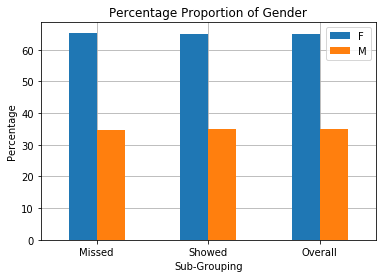

In [30]:
# visualize percentage proportion of gender 
bar_plot(attribute='Gender',
         title='Percentage Proportion of Gender',
         legend=["F",'M']
        );

There are no significant differences in gender among the entire dataset and individual groups of those who missed their appointments and those who showed up, showing ~65% Female and ~35% Male among the three groupings.

In [31]:
# inspect proportions of scholarship in the entire dataset 
entir_inspect(attribute='Scholarship')

Frequencies:
0    99665
1    10861
Name: Scholarship, dtype: int64

Percentages:
0    90.173353
1     9.826647
Name: Scholarship, dtype: float64


In [32]:
# proportions (percentage) of scholarship between showed and missed
compare(attribute='Scholarship')

Missed:
0    88.449303
1    11.550697
Name: Scholarship, dtype: float64

Showed:
0    90.609589
1     9.390411
Name: Scholarship, dtype: float64


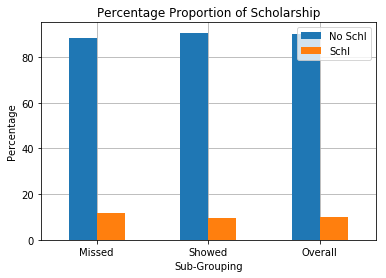

In [33]:
# visualize percentage proportion of Scholarship
bar_plot(attribute = 'Scholarship',
         title = 'Percentage Proportion of Scholarship',
         legend = ["No Schl",'Schl']
        );

Although a large percentage of the appointsments (~90%) are not in the Bolsa Familia welfare program, for those who missed the appointment, a slightly larger percent, ~11.55%, were in the program as compared to the entire dataset at 9.83%. I think we need to look closely at that attribute, maybe using inferential statistics.

In [34]:
# inspect proportions of hipertension in the entire dataset 
entir_inspect(attribute='Hipertension')

Frequencies:
0    88725
1    21801
Name: Hipertension, dtype: int64

Percentages:
0    80.275229
1    19.724771
Name: Hipertension, dtype: float64


A large proportion of the appointments were hypertension related, at ~20%.

In [35]:
# proportions (percentage) of hypertension between showed and missed
compare(attribute='Hipertension')

Missed:
0    83.099601
1    16.900399
Name: Hipertension, dtype: float64

Showed:
0    79.560579
1    20.439421
Name: Hipertension, dtype: float64


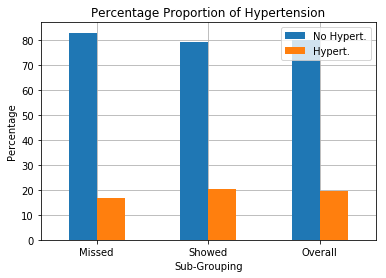

In [36]:
# visualize percentage proportion of Hypertension
bar_plot(attribute='Hipertension',
         title='Percentage Proportion of Hypertension',
         legend=["No Hypert.",'Hypert.']
        );

We note that a larger portion of those who showed up ~20%, had hypertension as compared to those who missed at ~17%. The factor is positively related to attendance. 

In [37]:
# inspect proportions of sms_received in the entire dataset 
entir_inspect(attribute='SMS_received')

Frequencies:
0    75044
1    35482
Name: SMS_received, dtype: int64

Percentages:
0    67.897146
1    32.102854
Name: SMS_received, dtype: float64


In [38]:
# compare (percentage) sms received between showed and missed
compare(attribute='SMS_received')

Missed:
0    56.162911
1    43.837089
Name: SMS_received, dtype: float64

Showed:
0    70.866258
1    29.133742
Name: SMS_received, dtype: float64


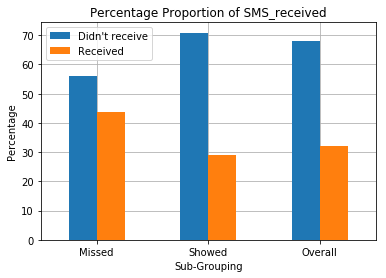

In [39]:
# visualize percentage proportion of SMS_received
bar_plot(attribute='SMS_received',
         title='Percentage Proportion of SMS_received',
         legend=["Didn't receive",'Received']
        );

For those who did not show up, about 56% did not receive sms, while ~43% received an sms. For those who did show up, ~70% did not receive an sms while ~29% recieved an sms. Compared to the entire dataset, ~67% did not receive a sms while ~32% received an sms. These are interesting results as one would expect a higher sms receiving percentage among those who showed up than those who missed but its vice versa. 

<a id='conclusions'></a>
## Conclusions

We noted that about 79.8% appointments were attended while about 20.2% were missed. We also observed that there are no significant differences in gender among those who missed their appointments and those who showed up vs the entire dataset  which showed a similar trend of ~65% Female and ~35% Male among the three groupings. 

I, however, observed that although a large percentage of the appointments (~90%) are not in the Bolsa Familia welfare program, for the rest who were enrolled in the program, for those who missed the appointment, a slightly larger percent, ~11.55%, were enrolled in the program as compared to the entire dataset at 9.83% and may need to be analysed more closely.

I also noted  that a large percentage of the appointments, about 20% were suffering from hypertension and showed for their appointments more than the alternate group.A suprising result was with the SMS received attribute where more of those who received the SMS missed their appointments than those who did not receive an SMS.

Some of the limitations include:
<ul>
    <li>The data might not be complete since i did not collect the data myself.</li>
    <li>Also, correlation does not mean causation for the points noted above.</li>
    <li>Some of the columns such as 'Handcap' were not clear as to what the figures represented.</li>
</ul>

In conclusion, the dataset was informative enough and the descriptive analysis helped us pinpoint some of the outstanding attributes that may help answer our question. We can therefore recommend that we conduct more thorough statistical tests to shed more light on this dataset.


## Submitting Project 

In [40]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0